In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.SVM import load_results, save_results
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [16]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

kernel='rbf'
C_list=[0.1,1,10,100,1000]
gamma_list=[0.0001,0.001,0.01,0.1,1]
epsilon_list=[0.001]
HP_list = itertools.product(gamma_list, C_list, epsilon_list)
results = []
for HyperParam in HP_list:
    gamma_s, C_s, epsilon_s = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma_s,C=C_s,epsilon=epsilon_s,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C_s, epsilon_s, gamma_s, res[0], res[1], res[2]
    results.append(res)

columns=['C', 'epsilon', 'gamma', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)
# load all saved results
df = load_results(kernel)

In [20]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean']).head()

,C,epsilon,gamma,MEE_mean,MEE_std,seconds
17,10.0,0.001,0.10,2.958995,0.171739,0.121038
18,100.0,0.001,0.10,3.123882,0.167362,0.128947
16,1.0,0.001,0.10,3.206170,0.181968,0.119483
14,1000.0,0.001,0.01,3.233564,0.146512,0.123410
13,100.0,0.001,0.01,3.353219,0.122090,0.113116


' '

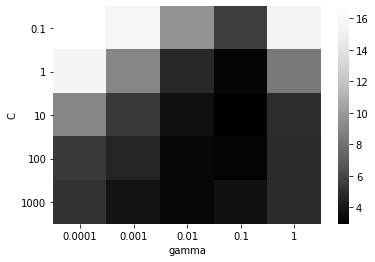

In [33]:
df2 = df
df2 = df2.sort_values(by=['C', 'gamma'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 5)
ax = sns.heatmap(array, xticklabels=gamma_list, yticklabels=C_list,cmap='Greys_r')
plt.yticks(rotation=0)
ax.set_xlabel('gamma')
ax.set_ylabel('C')
' '

In [ ]:
kernel='poly'
C_list=[0.1,1,10,100,1000]
gamma_list=[0.0001,0.001,0.01,0.1,1]
epsilon_list=[0.001]
HP_list = itertools.product(gamma_list, C_list, epsilon_list)
results = []
for HyperParam in HP_list:
    gamma_s, C_s, epsilon_s = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma_s,C=C_s,epsilon=epsilon_s,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C_s, epsilon_s, gamma_s, res[0], res[1], res[2]
    results.append(res)

columns=['C', 'epsilon', 'degree', 'coeff', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)
# load all saved results
df = load_results(kernel)